In [15]:
import numpy as np
import pandas as pd

folderdir = 'ml-latest-small/'
moviesdata = 'movies.csv'
ratingsdata = 'ratings.csv'
tagsdata = 'tags.csv'
moviesdf = pd.read_csv(folderdir + moviesdata)
ratingsdf = pd.read_csv(folderdir + ratingsdata)
tagsdf = pd.read_csv(folderdir + tagsdata)

In [16]:
#This is to check if there are '0' rating given.
np.unique(ratingsdf.rating)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [17]:
ratingsdf

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Construct the R matrix: an m x n matrix containing m users (rows) and n movies (columns); 
The (i, j) entry of the matrix is the rating of user i for movie j and is denoted by Rij.

In [18]:
R_matrix = pd.pivot_table(ratingsdf,index='userId', columns='movieId',values='rating',fill_value=0)
R_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


### Q1) Calculate the Sparsity of the movie rating dataset

In [25]:
num_r_users, num_r_movies = R_matrix.shape
total_r_ratings = np.count_nonzero(R_matrix)
spar_ratings = total_r_ratings / (num_r_users * num_r_movies)
print('Number of users is {}; Number of movies is {}; \nTotal Number of existing ratings is {};'.format(num_r_users,num_r_movies,total_r_ratings))
print('Sparsity is {}'.format(spar_ratings))

Number of users is 610; Number of movies is 9724; 
Total Number of existing ratings is 100836;
Sparsity is 0.016999683055613623


### Q2) Plot a histogram showing the frequency of the rating values. 
To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

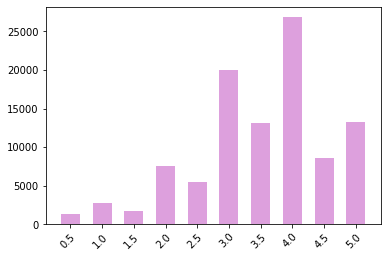

In [6]:
import matplotlib
import matplotlib.pyplot as plt
r_values, counts = np.unique(ratingsdf.rating, return_counts=True)
fig, ax = plt.subplots()
ax.bar(r_values, counts, width=0.3, color='plum')
ax.set_xticks(r_values)
ax.set_xticklabels(r_values, rotation=45, rotation_mode="anchor", ha="right")
plt.savefig('hist_ratings.jpg')
plt.show()

In [7]:
np.mean(ratingsdf.rating)

3.501556983616962

Comment: Obersing the average value of ratings, the histogram makes sense because the highest 2 bars happens at the score of 3.0 and 4.0; This corresponds to the average rating of 3.502.

### Q3) Plot the distribution of the number of ratings received among movies.
To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected. 

9724


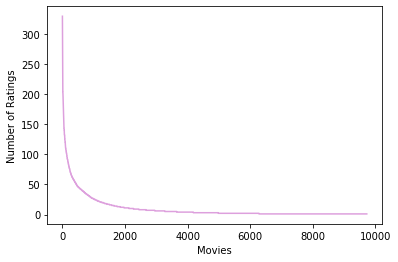

In [27]:
R_matrixArr = R_matrix.values
RatingsbyMovie = [np.count_nonzero(R_matrixArr[:,movie]) for movie in range(num_r_movies)]
print(len(RatingsbyMovie))
movieIds = list(R_matrix.columns.values)
sortedRatingsbyMovie, sortedmovieIds = zip(*sorted(zip(RatingsbyMovie, movieIds), reverse=True))
#plot the curve
indices = range(len(sortedmovieIds))
fig, ax = plt.subplots()
ax.plot(indices, sortedRatingsbyMovie, color='plum')
plt.xlabel("Movies")
plt.ylabel("Number of Ratings")
plt.savefig('hist_ratingsbymovies.jpg')
plt.show()

### Q4) Plot the distribution of ratings among users. 
To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated.

610


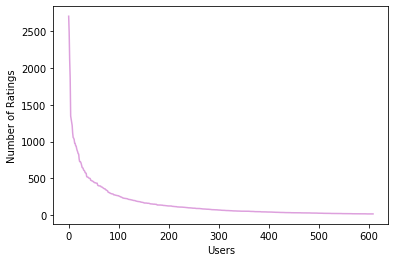

In [9]:
RatingsbyUser = [np.count_nonzero(R_matrixArr[user,:]) for user in range(num_r_users)]
print(len(RatingsbyUser))
userIds = list(R_matrix.index.values)
sortedRatingsbyUser, sorteduserIds = zip(*sorted(zip(RatingsbyUser, userIds), reverse=True))
#plot the curve
indices = range(len(sorteduserIds))
fig, ax = plt.subplots()
ax.plot(indices, sortedRatingsbyUser, color='plum')
plt.xlabel("Users")
plt.ylabel("Number of Ratings")
plt.savefig('hist_ratingsbyusers.jpg')
plt.show()

### Q5) Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

ANSWER: From the plot in question 3, it can be observed that there are few movies with significantly higher number of ratings than the others, while most movies have small number of ratings. This implies that the ratings are very sparse, making the recommendation  inefficient. A possible way to compensate this is prune the movies with number of ratings less than certain threshold. 

### Question 6: Compute the variance of the rating values received by each movie.
Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

In [10]:
variances = []
for movie in range(num_r_movies):
    variances.append(np.var(R_matrixArr[np.nonzero(R_matrixArr[:,movie]),movie]))
varmax, varmin = np.max(variances), np.min(variances)
print(varmax, varmin)

5.0625 0.0


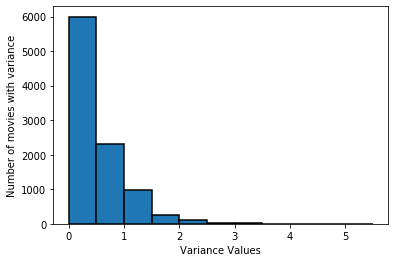

In [11]:
varValues = np.arange(12)/2
plt.hist(variances, bins=varValues,edgecolor='black', linewidth=1.5)
plt.xlabel("Variance Values")
plt.ylabel("Number of movies with variance")
plt.show()

The histogram makes sense. Most variances are small at the bin of 0 ~ 0.5, meaning that the movies often have similar ratings among the users who review them. 

### Question 7: Write down the formula for (Miu)u in terms of Iu and ruk 

Answer presented in report

###  Q8) In plain words, explain the meaning of Iu intercept Iv. Can Iu intercept Iv = EmptySet;
(Hint: Rating matrix R is sparse).

ANSWER: Iu intercept Iv means the set of items that are given ratings by both user u and user v. It is possible to have and empty set as Iu intercept Iv. It happens when the two users have not rated any of the items that each other have rated. 

### Q9) Can you explain the reason behind mean-centering the raw ratings (rvj - (Miu)v) in the prediction function? 
(Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function) 

ANSWER: By mean-centering the raw ratings, each user's ratings are subtracted by his/her own average ratings. Since each users have different personal rating metrics and habits, it is important to have this mean-centering as a way of normalising the data. Otherwise, the prediction model become skewed due to different type of users in the data.

### Q10) Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. 
Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [12]:
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(ratingsdf[['userId', 'movieId', 'rating']], reader)

sim_options = {'name': 'pearson_baseline'}
ks = np.linspace(2, 100, num=50)
RMSEs = []
MAEs = []
for k in ks:
    algo = KNNWithMeans(k=int(k),sim_options=sim_options)
    result = cross_validate(algo, data,measures=['rmse', 'mae'],cv=10,verbose=False)
    RMSEs.append(np.mean(result['test_rmse'])) #average tmse
    MAEs.append(np.mean(result['test_mae'])) #average mae

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


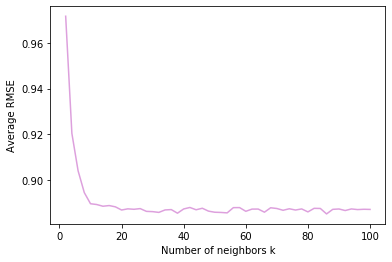

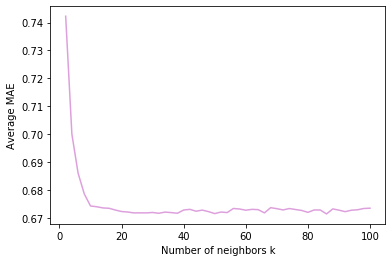

In [13]:
fig, ax = plt.subplots()
ax.plot(ks, RMSEs, color='plum')
plt.xlabel("Number of neighbors k")
plt.ylabel("Average RMSE")
plt.savefig('Avg RMSE vs k.jpg')
plt.show()

fig, ax = plt.subplots()
ax.plot(ks, MAEs, color='plum')
plt.xlabel("Number of neighbors k")
plt.ylabel("Average MAE")
plt.savefig('Avg MAE vs k.jpg')
plt.show()

### Question 11: Use the plot from question 10, to find a 'minimum k'. 
Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE

In [14]:
minimum_k = 14
print('{},{:0.3f},{:0.3f}'.format(ks[int(minimum_k/2)-1],RMSEs[int(minimum_k/2)-1], MAEs[int(minimum_k/2)-1]))

14.0,0.889,0.674


ANSWER: The minimum k is approximately 14 and the stable value of average RMSE is 0.888 and the stable value of average MAE is 0.672

### Question 12: Design a k-NN collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it's performance using 10-fold cross validation. 
Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

In [1]:
def getDic(dataset):
    outputDic = {}
    for userId, movieId, rating in dataset:
        if int(movieId) in outputDic:
            outputDic[int(movieId)].append((int(userId), rating))
        else:
            outputDic[int(movieId)] = [(int(userId),rating)]
    return outputDic
def populartrim(trainset, testset):
    popular_ids = []
    testsetDic = getDic(testset)
    for movieId, u_r_tuples in testsetDic.items():
        ratingsReceived = len(u_r_tuples) + len(trainset.ir[movieId])
        if ratingsReceived > 2:
            popular_ids.append(movieId)
    
    trimmedtestset = []
    for userId, movieId, rating in testset:
        if int(movieId) in popular_ids:
            trimmedtestset.append((userId, movieId, rating))
            
    return trimmedtestset

In [16]:
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(ratingsdf[['userId', 'movieId', 'rating']], reader)

sim_options = {'name': 'pearson_baseline'}

ks = np.linspace(2, 100, num=50)
kf = KFold(n_splits=10)
Average_RMSEs = []
for k in ks:
    print('current k : ',k)
    RMSEsforeachk = []
    algo = KNNWithMeans(k=int(k), sim_options={'name': 'pearson_baseline'})
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(populartrim(trainset, testset))
        RMSEsforeachk.append(accuracy.rmse(predictions))     
    Average_RMSEs.append(np.mean(RMSEsforeachk))


current k :  2.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9645
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9702
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9631
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9618
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9777
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9697
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9672
Estimating biases using als...
Computing the pearson_baseline similarity 

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8757
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8562
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8810
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8843
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8726
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8818
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8606
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 0.8800
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8532
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8868
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8610
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8738
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8722
current k :  28.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8794
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8725
Estimating biases using a

RMSE: 0.8673
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8779
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8667
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8696
current k :  40.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8652
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8645
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8722
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8768
Estimating biases using als...
Computing the pearson_baseli

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8773
current k :  52.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8630
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8653
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8795
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8556
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8830
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8659
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

Done computing similarity matrix.
RMSE: 0.8738
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8614
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8689
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8797
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8638
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8688
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8812
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8680
Estimating biases using als...
Computing th

RMSE: 0.8777
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8661
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8743
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8735
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8619
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8660
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8738
current k :  78.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8644
Estimating biases using als...
Computing the pearson_baseli

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8687
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8711
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8567
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8905
current k :  90.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8681
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8881
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8839
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

Done computing similarity matrix.
RMSE: 0.8669
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8851


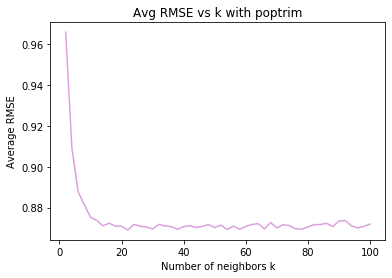

Minimum Average RMSE =  0.869046126700135


In [17]:
fig, ax = plt.subplots()
ax.plot(ks, Average_RMSEs, color='plum')
plt.xlabel("Number of neighbors k")
plt.ylabel("Average RMSE")
plt.title('Avg RMSE vs k with poptrim')
plt.savefig('AvgRMSE_vs_k_poptrim.jpg')
plt.show()
print('Minimum Average RMSE = ', np.min(Average_RMSEs))

### Question 13: Design a k-NN collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it's performance using 10-fold cross validation. 
Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE 

In [18]:
def unpopulartrim(trainset, testset):
    unpopular_ids = []
    testsetDic = getDic(testset)
    for movieId, u_r_tuples in testsetDic.items():
        ratingsReceived = len(u_r_tuples) + len(trainset.ir[movieId])
        if ratingsReceived <= 2:
            unpopular_ids.append(movieId)
    
    trimmedtestset = []
    for userId, movieId, rating in testset:
        if int(movieId) in unpopular_ids:
            trimmedtestset.append((userId, movieId, rating))
            
    return trimmedtestset

In [19]:
ks = np.linspace(2, 100, num=50)
kf = KFold(n_splits=10)
Average_RMSEs_unpop = []
for k in ks:
    print('current k : ',k)
    RMSEsforeachk = []
    algo = KNNWithMeans(k=int(k), sim_options=sim_options)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(unpopulartrim(trainset, testset))
        RMSEsforeachk.append(accuracy.rmse(predictions))     
    Average_RMSEs_unpop.append(np.mean(RMSEsforeachk))

current k :  2.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9957
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9854
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0068
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0125
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0463
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9893
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0107
Estimating biases using als...
Computing the pearson_baseline similarity 

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0186
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9988
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9791
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9313
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9903
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9597
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9822
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9707
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9630
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9639
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0002
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9992
current k :  28.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9994
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9361
Estimating biases using als...
Computing the pearson_baseline similarity

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9727
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9531
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9721
current k :  40.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9451
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0330
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9782
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9874
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

RMSE: 1.0140
current k :  52.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0012
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9810
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9371
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9755
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9963
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9607
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0105
Estimating biases using als...
Computing the pearson_baseli

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0104
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9822
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9500
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9755
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9557
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9554
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9989
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0223
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0189
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9689
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9572
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9705
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0111
current k :  78.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9702
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

Done computing similarity matrix.
RMSE: 0.9763
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9559
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0194
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9942
current k :  90.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9616
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9471
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9824
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9817
Estimating biases using a

RMSE: 0.9795
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9473


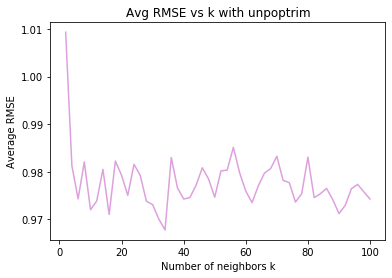

In [20]:
fig, ax = plt.subplots()
ax.plot(ks, Average_RMSEs_unpop, color='plum')
plt.xlabel("Number of neighbors k")
plt.ylabel("Average RMSE")
plt.title('Avg RMSE vs k with unpoptrim')
plt.savefig('AvgRMSE_vs_k_unpoptrim.jpg')
plt.show()

### Question 14: Design a k-NN collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it's performance using 10-fold cross validation. 
Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

In [19]:
def highvartrim(trainset, testset):
    fivepop_ids = []
    testsetDic = getDic(testset)
    
    movieIds = list(R_matrix.columns.values)
    variances = []
    for movie in range(num_r_movies):
        variances.append(np.var(R_matrixArr[np.nonzero(R_matrixArr[:,movie]),movie]))    
    HVmovieId = []
    for i in range(len(movieIds)):
        if(variances[i]>2):
            HVmovieId.append(movieIds[i])
            
    for movieId, u_r_tuples in testsetDic.items():
        ratingsReceived = len(u_r_tuples) + len(trainset.ir[movieId])
        if ratingsReceived >= 5:
            fivepop_ids.append(movieId)
            
    highvarandfive_ids = list(set(HVmovieId) & set(fivepop_ids)) 
    trimmedtestset = []
    for userId, movieId, rating in testset:
        if int(movieId) in highvarandfive_ids:
            trimmedtestset.append((userId, movieId, rating))
            
    return trimmedtestset

In [22]:
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold
ks = np.linspace(2, 100, num=50)
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(ratingsdf[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson_baseline'}
kf = KFold(n_splits=10)
Average_RMSEs_hivar = []
for k in ks:
    print('current k : ',k)
    RMSEsforeachk = []
    algo = KNNWithMeans(k=int(k), sim_options=sim_options)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(highvartrim(trainset, testset))
        RMSEsforeachk.append(accuracy.rmse(predictions))     
    Average_RMSEs_hivar.append(np.mean(RMSEsforeachk))

current k :  2.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0495
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5038
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4673
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8390
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.7324
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7545
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6808
Estimating biases using als...
Computing the pearson_baseline similarity 

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.2983
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7850
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6808
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.9359
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4489
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1295
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.4201
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 2.0708
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0794
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.1191
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7784
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6198
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.6176
current k :  28.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7483
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0046
Estimating biases using a

RMSE: 1.9193
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8574
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7897
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6415
current k :  40.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8238
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5397
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7597
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6946
Estimating biases using als...
Computing the pearson_baseli

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7385
current k :  52.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5710
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8493
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8829
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.1710
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1195
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4479
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

Done computing similarity matrix.
RMSE: 1.5408
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0001
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7634
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.9382
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6242
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7967
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7217
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8197
Estimating biases using als...
Computing th

RMSE: 2.0369
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6701
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7372
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6697
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5844
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.9322
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8363
current k :  78.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.1229
Estimating biases using als...
Computing the pearson_baseli

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.8237
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7925
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0601
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4188
current k :  90.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4494
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.7937
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4423
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

Done computing similarity matrix.
RMSE: 1.9025
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.9174


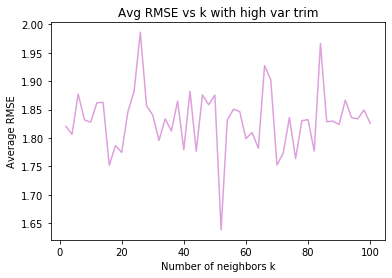

Minimum Average RMSE =  1.6379124715094953


In [23]:
fig, ax = plt.subplots()
ax.plot(ks, Average_RMSEs_hivar, color='plum')
plt.xlabel("Number of neighbors k")
plt.ylabel("Average RMSE")
plt.title('Avg RMSE vs k with high var trim')
plt.savefig('AvgRMSE_vs_k_hivartrim.jpg')
plt.show()
print('Minimum Average RMSE = ', np.min(Average_RMSEs_hivar))

### Question 15: Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values [2.5, 3, 3.5, 4].
For the ROC plotting use the k found in question 11. For each of the plots, also report the area under the curve (AUC) value.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


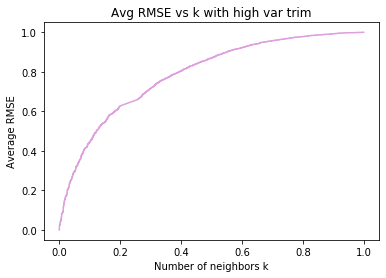

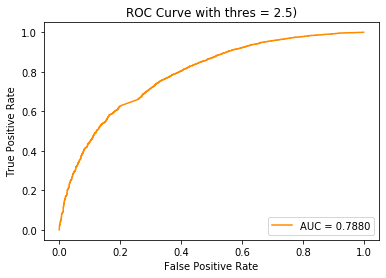

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


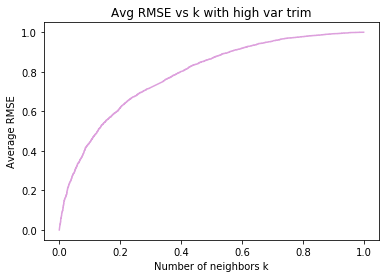

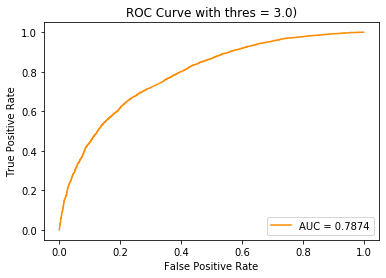

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


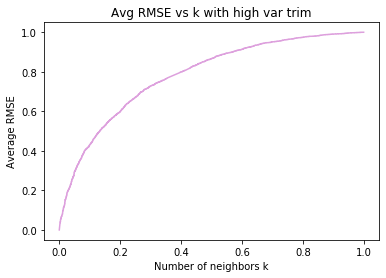

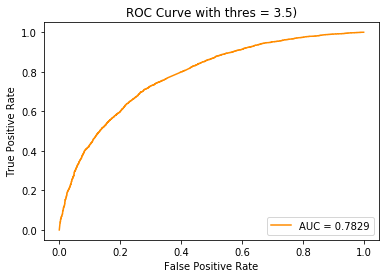

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


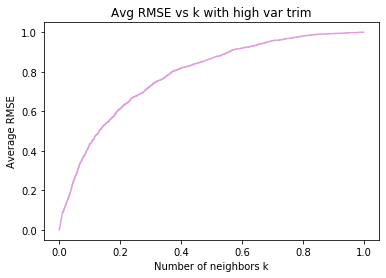

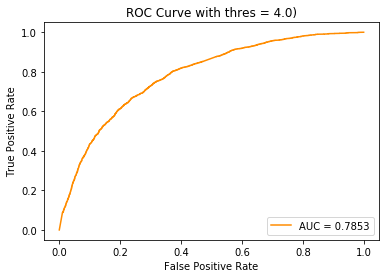

In [24]:
from sklearn import metrics
from surprise.model_selection import train_test_split

thres = [2.5, 3, 3.5, 4]
for threshold in thres:
    reader = Reader(rating_scale=(1.0, 5.0))
    data = Dataset.load_from_df(ratingsdf[['userId', 'movieId', 'rating']], reader)

    trainset, testset = train_test_split(data, test_size=0.1)
    algo = KNNWithMeans(k=14, sim_options={'name': 'pearson_baseline'})
    
    for j in range(len(testset)):
        (userID, movieID, rating) = testset[j]
        if rating > threshold:
            testset[j] = (userID, movieID, 1)
        elif rating <= threshold:
            testset[j] = (userID, movieID, 0)
    
    algo.fit(trainset)
    pred = algo.test(testset)
    y_truth = []
    y_score= []
    for userid, movieid, rating_true, rating_pred, details in pred:
        y_score.append(rating_pred)
    for uid, iid, rating_true in testset:
        y_truth.append(rating_true)
    fpr, tpr, _ = metrics.roc_curve(y_truth, y_score)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='plum')
    plt.xlabel("Number of neighbors k")
    plt.ylabel("Average RMSE")
    plt.title('Avg RMSE vs k with high var trim')
    plt.savefig('AvgRMSE_vs_k_hivartrim.jpg')
    plt.show() 
    
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='darkorange', label= 'AUC = %0.4f' % metrics.auc(fpr,tpr))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with thres = %.1f)' % threshold)
    plt.savefig('ROC Curve with thres = %.1f.jpg' % threshold)  
    plt.legend(loc="lower right")
    plt.show()

In [12]:
from surprise.prediction_algorithms import NMF
from surprise.prediction_algorithms import SVD
from surprise import accuracy
from surprise import AlgoBase
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold

In [10]:
def NNMF(data):
    rmse = []
    mae = []
    for k in np.arange(2,52,2):
        nmf = NMF(n_factors=k)
        result_dict = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=10, 
                                     verbose=True)
        rmse.append(np.mean(result_dict['test_rmse']))
        mae.append(np.mean(result_dict['test_mae']))
    return rmse,mae
def plot_rmse(rmse):
    # plot average RMSE
    x = range(2,52,2)
    plt.plot(x,rmse,color='dodgerblue')
    plt.grid(True,linestyle='-.')
    plt.xlabel('k (number of latent factors)')
    plt.ylabel('average RMSE')
    plt.title('average RMSE against k')
    plt.figure()
def plot_mae(mae):
    # plot average MAE
    x = np.arange(2,52,2)
    plt.plot(x,mae,color='tomato')
    plt.grid(True,linestyle='-.')
    plt.xlabel('k (number of latent factors)')
    plt.ylabel('average MAE')
    plt.title('average MAE against k')
# df convert to surprise dataset
def load_dataset(df):
    reader = Reader(rating_scale=(0.5, 5))
    dataset = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    return dataset

## Q17

Design a NNMF-based collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

### NNMF on original dataset

In [29]:
original_data = load_dataset(ratingsdf)
rmse, mae = NNMF(original_data)

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1506  1.1405  1.1295  1.1388  1.1381  1.1308  1.1600  1.1526  1.1457  1.1582  1.1445  0.0102  
MAE (testset)     0.9675  0.9639  0.9497  0.9576  0.9593  0.9497  0.9731  0.9686  0.9601  0.9741  0.9624  0.0082  
Fit time          2.99    2.99    2.98    2.99    2.99    2.99    2.98    3.01    2.99    2.99    2.99    0.01    
Test time         0.04    0.04    0.04    0.04    0.10    0.04    0.04    0.04    0.04    0.04    0.05    0.02    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0231  1.0500  1.0363  1.0360  1.0342  1.0402  1.0267  1.0493  1.0350  1.0452  1.0376  0.0084  
MAE (testset)     0.8372  0.8624  0.8436  0.8480  0.8461  0.8506  0.8388  0.8586  0.8

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9170  0.9286  0.9445  0.9338  0.9280  0.9440  0.9288  0.9396  0.9125  0.9170  0.9294  0.0108  
MAE (testset)     0.6925  0.6974  0.7170  0.7065  0.6999  0.7063  0.7013  0.7099  0.6883  0.6888  0.7008  0.0089  
Fit time          7.13    7.11    7.14    7.13    7.15    7.13    7.14    7.14    7.15    7.16    7.14    0.01    
Test time         0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.10    0.05    0.02    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9406  0.9340  0.9395  0.9244  0.9383  0.9303  0.9334  0.9363  0.9375  0.9339  0.9348  0.0046  
MAE (testset)     0.7069  0.7055  0.7071  0.6982  0.7013  0.7017  0.7055  0.7073  0.7

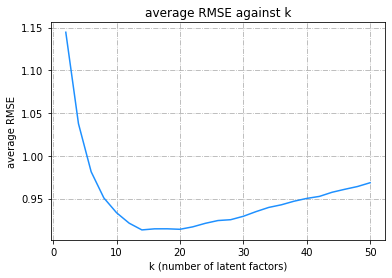

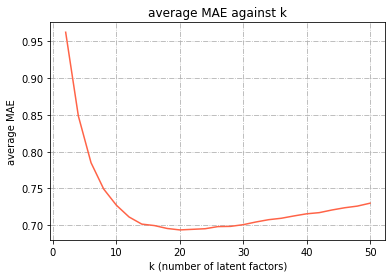

In [30]:
plot_rmse(rmse)
plot_mae(mae)

## Q18

Use the plot from question 17, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?

In [31]:
# minimum average RMSE and MAE
k_rmse = range(2,52,2)[rmse.index(min(rmse))]
k_mae = range(2,52,2)[mae.index(min(mae))]

min_rmse = min(rmse)
min_mae = min(mae)

print('The optimal k for RMSE is:',k_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',k_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 14
The minimum average RMSE value is: 0.9134364555902479
The optimal k for MAE is: 20
The minimum average MAE value is: 0.6936575759059782


In [32]:
# number of movie genres
movies = pd.read_csv('C:/Users/67563/Downloads/ml-latest-small/ml-latest-small/movies.csv')
genres = movies['genres']
genres = [x.split('|') for x in genres]
genres = set([y for x in genres for y in x])
print('the number of genres is:',len(genres))

the number of genres is: 20


## Q19-21

In [36]:
def NNMF_trimmed(ratings_df,trim):
    # Load the ratings dataset
    data = load_dataset(ratings_df)
    # define a cross-validation iterator
    kf = KFold(n_splits=10)
    rmse = []
    for k in range(2,52,2):
        nmf = NMF(n_factors=k)
        rmse_per = []
        for trainset, testset in kf.split(data):  # trainset and testset are [10,] lists 
            # train and test algorithm.
            nmf.fit(trainset)
            testset_trimmed = trim(trainset,testset)
            predictions = nmf.test(testset_trimmed)

            # Compute and print Root Mean Squared Error
            rmse_per.append(accuracy.rmse(predictions, verbose=True))
        rmse.append(np.mean(rmse_per))
    return rmse

### NNMF on popular movie trimmed dataset

In [37]:
#rmse_pmt = NNMF_trimmed(ratings_df,PMT)
rmse_pmt = NNMF_trimmed(ratingsdf,populartrim)

RMSE: 1.1408
RMSE: 1.1370
RMSE: 1.1347
RMSE: 1.1502
RMSE: 1.1317
RMSE: 1.1403
RMSE: 1.1490
RMSE: 1.1382
RMSE: 1.1457
RMSE: 1.1415
RMSE: 1.0261
RMSE: 1.0274
RMSE: 1.0278
RMSE: 1.0305
RMSE: 1.0359
RMSE: 1.0243
RMSE: 1.0282
RMSE: 1.0210
RMSE: 1.0330
RMSE: 1.0432
RMSE: 0.9601
RMSE: 0.9631
RMSE: 0.9704
RMSE: 0.9699
RMSE: 0.9648
RMSE: 0.9609
RMSE: 0.9668
RMSE: 0.9529
RMSE: 0.9696
RMSE: 0.9629
RMSE: 0.9315
RMSE: 0.9205
RMSE: 0.9279
RMSE: 0.9415
RMSE: 0.9428
RMSE: 0.9279
RMSE: 0.9254
RMSE: 0.9411
RMSE: 0.9418
RMSE: 0.9367
RMSE: 0.9168
RMSE: 0.9130
RMSE: 0.9134
RMSE: 0.9070
RMSE: 0.9237
RMSE: 0.9119
RMSE: 0.9085
RMSE: 0.9042
RMSE: 0.9069
RMSE: 0.9141
RMSE: 0.9041
RMSE: 0.9074
RMSE: 0.8922
RMSE: 0.9013
RMSE: 0.8860
RMSE: 0.8917
RMSE: 0.9114
RMSE: 0.9019
RMSE: 0.9098
RMSE: 0.9125
RMSE: 0.8876
RMSE: 0.8884
RMSE: 0.8841
RMSE: 0.9009
RMSE: 0.9112
RMSE: 0.9001
RMSE: 0.8976
RMSE: 0.8993
RMSE: 0.9056
RMSE: 0.8879
RMSE: 0.8975
RMSE: 0.9006
RMSE: 0.8935
RMSE: 0.8866
RMSE: 0.8790
RMSE: 0.8909
RMSE: 0.8955

The minimum average RMSE value is: 0.8950157375209391


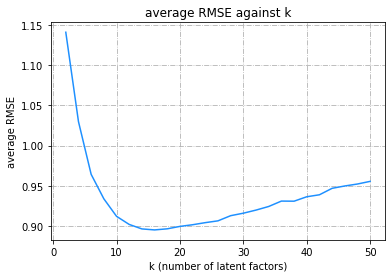

<Figure size 432x288 with 0 Axes>

In [38]:
plot_rmse(rmse_pmt)
min_rmse_pmt = min(rmse_pmt)
print('The minimum average RMSE value is:',min_rmse_pmt)

### NNMF on unpopular movie trimmed dataset

In [52]:
rmse_upmt = NNMF_trimmed(ratingsdf,unpopulartrim)

RMSE: 1.1794
RMSE: 1.1477
RMSE: 1.1941
RMSE: 1.1603
RMSE: 1.1706
RMSE: 1.1748
RMSE: 1.2073
RMSE: 1.1521
RMSE: 1.1419
RMSE: 1.1609
RMSE: 1.0941
RMSE: 1.1261
RMSE: 1.1026
RMSE: 1.1134
RMSE: 1.1082
RMSE: 1.0977
RMSE: 1.0978
RMSE: 1.0680
RMSE: 1.0965
RMSE: 1.1303
RMSE: 1.0450
RMSE: 1.0880
RMSE: 1.0799
RMSE: 1.0891
RMSE: 1.0309
RMSE: 1.0647
RMSE: 1.0549
RMSE: 1.0384
RMSE: 1.0727
RMSE: 1.1034
RMSE: 1.0552
RMSE: 1.0273
RMSE: 1.0701
RMSE: 1.0573
RMSE: 1.0341
RMSE: 1.0663
RMSE: 1.0348
RMSE: 1.0445
RMSE: 1.0591
RMSE: 1.0848
RMSE: 1.0098
RMSE: 1.0366
RMSE: 1.0666
RMSE: 1.0155
RMSE: 1.0561
RMSE: 1.0461
RMSE: 1.0307
RMSE: 1.0067
RMSE: 1.0311
RMSE: 1.0651
RMSE: 1.0228
RMSE: 1.0367
RMSE: 1.0402
RMSE: 1.0072
RMSE: 1.0457
RMSE: 1.0549
RMSE: 1.0438
RMSE: 1.0284
RMSE: 1.0185
RMSE: 0.9966
RMSE: 1.0099
RMSE: 1.0979
RMSE: 0.9999
RMSE: 1.0078
RMSE: 1.0489
RMSE: 1.0414
RMSE: 1.0322
RMSE: 1.0042
RMSE: 0.9903
RMSE: 1.0271
RMSE: 1.0617
RMSE: 1.0331
RMSE: 1.0166
RMSE: 0.9988
RMSE: 0.9962
RMSE: 1.0485
RMSE: 1.0232

The minimum average RMSE value is: 1.005225586216699


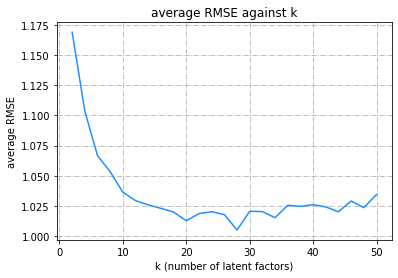

<Figure size 432x288 with 0 Axes>

In [53]:
plot_rmse(rmse_upmt)
min_rmse_upmt = min(rmse_upmt)
print('The minimum average RMSE value is:',min_rmse_upmt)

### NNMF on High variance movie trimming dataset

In [55]:
rmse_hvmt = NNMF_trimmed(ratingsdf,highvartrim)

RMSE: 2.0192
RMSE: 1.9838
RMSE: 2.1673
RMSE: 1.4508
RMSE: 1.9054
RMSE: 2.3189
RMSE: 2.3479
RMSE: 2.0869
RMSE: 2.3830
RMSE: 1.6747
RMSE: 2.2765
RMSE: 1.6953
RMSE: 2.2281
RMSE: 2.0464
RMSE: 2.0165
RMSE: 1.6678
RMSE: 2.2733
RMSE: 1.9870
RMSE: 1.9345
RMSE: 2.3266
RMSE: 2.4262
RMSE: 1.8408
RMSE: 1.7329
RMSE: 1.7062
RMSE: 1.8451
RMSE: 1.9657
RMSE: 2.2205
RMSE: 2.2913
RMSE: 2.1452
RMSE: 2.0446
RMSE: 2.1266
RMSE: 1.7919
RMSE: 1.8160
RMSE: 1.1698
RMSE: 2.2933
RMSE: 2.2962
RMSE: 2.0958
RMSE: 2.1776
RMSE: 1.5357
RMSE: 1.9054
RMSE: 2.0325
RMSE: 1.8156
RMSE: 2.1024
RMSE: 2.1460
RMSE: 2.0714
RMSE: 2.0412
RMSE: 2.2147
RMSE: 1.8480
RMSE: 2.1540
RMSE: 2.2153
RMSE: 2.0959
RMSE: 1.4942
RMSE: 1.8013
RMSE: 1.8064
RMSE: 2.3684
RMSE: 1.6200
RMSE: 2.3966
RMSE: 2.0205
RMSE: 1.5140
RMSE: 1.9018
RMSE: 2.3676
RMSE: 1.7268
RMSE: 2.1250
RMSE: 2.0690
RMSE: 2.0180
RMSE: 1.7201
RMSE: 1.7345
RMSE: 2.3380
RMSE: 2.2110
RMSE: 1.8308
RMSE: 1.8876
RMSE: 2.2456
RMSE: 1.7610
RMSE: 2.1660
RMSE: 1.8108
RMSE: 1.9425
RMSE: 2.2755

The minimum average RMSE value is: 1.841831032124843


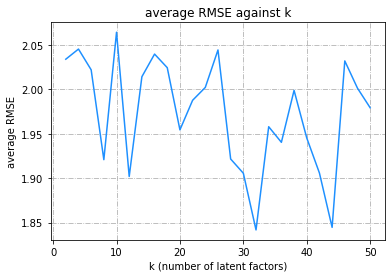

<Figure size 432x288 with 0 Axes>

In [56]:
plot_rmse(rmse_hvmt)
min_rmse_hvmt = min(rmse_hvmt)
print('The minimum average RMSE value is:',min_rmse_hvmt)

## Q22:

Plot the ROC curves for the NNMF-based collaborative filter
designed in question 17 for threshold values [2:5; 3; 3:5; 4]. For the ROC plot-
ting use the optimal number of latent factors found in question 18. For each of
the plots, also report the area under the curve (AUC) value.

In [15]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")
    
def get_labels(predictions,threshold):
    y_true, y_pred = [], []
    for u, i, r_real, r_pred, misc in predictions:
        y_true.append(threshold <= r_real)
        y_pred.append(r_pred)
    return y_pred, y_true   

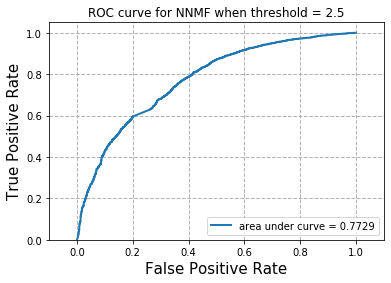

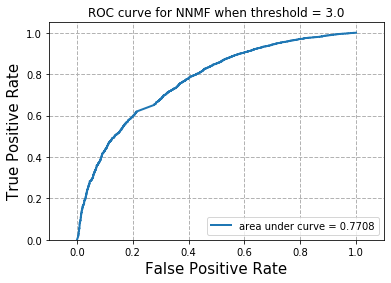

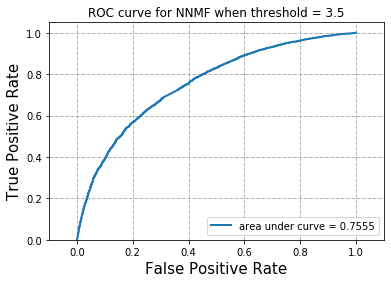

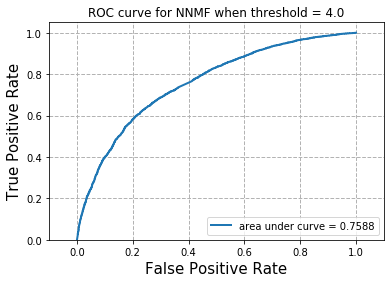

In [59]:
from surprise.model_selection import train_test_split
threshold = [2.5, 3, 3.5, 4]
nmf = NMF(n_factors=20)
trainset, testset = train_test_split(load_dataset(ratingsdf), test_size=.1)
predictions = nmf.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for NNMF when threshold = %2.1f' % thresh)

## Q23: 

Perform Non-negative matrix factorization on the ratings matrix
R to obtain the factor matrices U and V , where U represents the user-latent
factors interaction and V represents the movie-latent factors interaction (use k
= 20). For each column of V , sort the movies in descending order and report
the genres of the top 10 movies. Do the top 10 movies belong to a particular
or a small collection of genre? Is there a connection between the latent factors
and the movie genres?

In [61]:
#movies_df = pd.read_csv('ml-latest-small/movies.csv',names = ['movieId','title','genres'],header = 0)
nmf = NMF(n_factors=20)
nmf.fit(load_dataset(ratingsdf).build_full_trainset())
V = nmf.qi
for k in range(V.shape[1]):
    kcol = V[:,k]
    moviesMap = []
    for i in range(len(kcol)):
        moviesMap.append((i,kcol[i]))
    moviesMap.sort(key = lambda x:x[1],reverse = True)
    print('k=',k)
    for index in moviesMap[0:10]:
        print(moviesdf['genres'][index[0]])

k= 0
Comedy
Drama
Action|Comedy
Documentary
Film-Noir|Thriller
Horror|Thriller|IMAX
Drama|War
Drama
Comedy|Drama
Drama
k= 1
Comedy|Romance
Drama
Comedy|Romance
Action|Crime|Drama|Horror
Drama|Film-Noir|Romance
Comedy|Mystery
Crime
Drama
Drama|Romance
Horror
k= 2
Horror|Sci-Fi
Drama|Romance
Comedy
Drama
Comedy|Drama
Action|Adventure|Thriller|IMAX
Comedy|Drama|Romance
Comedy|Musical|Romance
Crime|Drama|Film-Noir|Thriller
Action|Sci-Fi|Thriller
k= 3
Crime|Drama|Thriller
Drama|Thriller
Drama|Thriller
War
Action|Sci-Fi|Thriller
Comedy
Action|Thriller
Crime|Horror|Thriller
Comedy|Drama
Documentary
k= 4
Drama
Action|Comedy|Sci-Fi|IMAX
Action|Comedy|Fantasy|Horror
Drama
Drama|Mystery|Thriller
Comedy|Horror|Romance|Thriller
Comedy
Drama
Drama|Thriller
Comedy|Romance
k= 5
Horror
Drama|Western
Crime|Drama|Thriller
Drama|Thriller
Action|Adventure|Drama|War
Comedy|Drama|Romance
Comedy|Horror|Sci-Fi
Adventure|Drama
Drama|Romance
Adventure|Comedy|Romance
k= 6
Adventure|Western
Comedy|Drama|Romance
Dr

## Q24: 

Design a MF with bias collaborative filter to predict the ratings of
the movies in the MovieLens dataset and evaluate it's performance using 10-fold
cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes
of 2, and for each k compute the average RMSE and average MAE obtained
by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE
(Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis).
For solving this question, use the default value for the regularization parameter.

In [33]:
def MF_bias(data):
    rmse = []
    mae = []
    for k in np.arange(2,52,2):
        svd = SVD(n_factors=k)
        result_dict = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, 
                                     verbose=True)
        rmse.append(np.mean(result_dict['test_rmse']))
        mae.append(np.mean(result_dict['test_mae']))
    return rmse,mae

In [34]:
original_data = load_dataset(ratingsdf)
rmse_MFbias, mae_MFbias = MF_bias(original_data)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8662  0.8746  0.8541  0.8767  0.8729  0.8608  0.8573  0.8685  0.8720  0.8635  0.8667  0.0072  
MAE (testset)     0.6642  0.6739  0.6555  0.6746  0.6740  0.6611  0.6600  0.6654  0.6701  0.6632  0.6662  0.0063  
Fit time          1.09    1.10    1.14    1.10    1.12    1.12    1.14    1.13    1.11    1.10    1.11    0.02    
Test time         0.12    0.04    0.04    0.04    0.04    0.04    0.05    0.10    0.04    0.04    0.06    0.03    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8554  0.8776  0.8668  0.8767  0.8631  0.8729  0.8678  0.8601  0.8685  0.8567  0.8666  0.0074  
MAE (testset)     0.6606  0.6711  0.6661  0.6750  0.6632  0.6695  0.6619  0.6619  0.6

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8620  0.8672  0.8641  0.8528  0.8607  0.8761  0.8698  0.8754  0.8725  0.8656  0.8666  0.0068  
MAE (testset)     0.6612  0.6662  0.6654  0.6563  0.6629  0.6724  0.6697  0.6695  0.6674  0.6654  0.6656  0.0044  
Fit time          2.10    2.12    2.09    2.04    2.12    2.01    2.02    2.08    2.10    2.08    2.08    0.04    
Test time         0.10    0.05    0.04    0.05    0.05    0.10    0.05    0.04    0.04    0.04    0.06    0.02    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8610  0.8681  0.8626  0.8677  0.8779  0.8662  0.8564  0.8623  0.8645  0.8752  0.8662  0.0061  
MAE (testset)     0.6591  0.6672  0.6600  0.6654  0.6726  0.6671  0.6612  0.6603  0.6

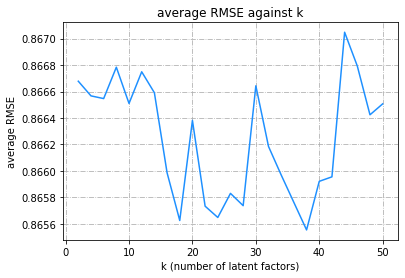

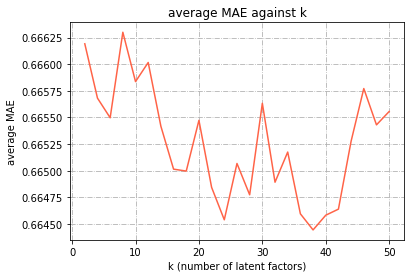

In [35]:
plot_rmse(rmse_MFbias)
plot_mae(mae_MFbias)

## Q25: 
Use the plot from question 24, to find the optimal number of
latent factors. Optimal number of latent factors is the value of k that gives
the minimum average RMSE or the minimum average MAE. Please report the
minimum average RMSE and MAE.

In [36]:
# minimum average RMSE and MAE
k_rmse_MFbias = range(2,52,2)[rmse_MFbias.index(min(rmse_MFbias))]
k_mae_MFbias = range(2,52,2)[mae_MFbias.index(min(mae_MFbias))]

min_rmse_MFbias = min(rmse_MFbias)
min_mae_MFbias = min(mae_MFbias)

print('The optimal k for RMSE is:',k_rmse_MFbias)
print('The minimum average RMSE value is:',min_rmse_MFbias)
print('The optimal k for MAE is:',k_mae_MFbias)
print('The minimum average MAE value is:',min_mae_MFbias)

The optimal k for RMSE is: 38
The minimum average RMSE value is: 0.8655543962936827
The optimal k for MAE is: 38
The minimum average MAE value is: 0.6644433494286953


## Q26-28

In [2]:
def MF_bias_trimmed(ratings_df,trim):
    # Load the ratings dataset
    data = load_dataset(ratings_df)
    # define a cross-validation iterator
    kf = KFold(n_splits=10)
    rmse = []
    for k in range(2,52,2):
        svd = SVD(n_factors=k)
        rmse_per = []
        for trainset, testset in kf.split(data):  # trainset and testset are [10,] lists 
            # train and test algorithm.
            svd.fit(trainset)
            testset_trimmed = trim(trainset,testset)
            predictions = svd.test(testset_trimmed)
            # Compute and print Root Mean Squared Error
            rmse_per.append(accuracy.rmse(predictions, verbose=True))
        rmse.append(np.mean(rmse_per))
    return rmse

### MF with bias on popular movie trimmed dataset

In [13]:
rmse_MFbias_pmt = MF_bias_trimmed(ratingsdf,populartrim)

RMSE: 0.8575
RMSE: 0.8749
RMSE: 0.8689
RMSE: 0.8569
RMSE: 0.8567
RMSE: 0.8606
RMSE: 0.8606
RMSE: 0.8609
RMSE: 0.8581
RMSE: 0.8707
RMSE: 0.8671
RMSE: 0.8592
RMSE: 0.8657
RMSE: 0.8572
RMSE: 0.8734
RMSE: 0.8802
RMSE: 0.8471
RMSE: 0.8580
RMSE: 0.8646
RMSE: 0.8620
RMSE: 0.8660
RMSE: 0.8636
RMSE: 0.8681
RMSE: 0.8566
RMSE: 0.8743
RMSE: 0.8604
RMSE: 0.8575
RMSE: 0.8469
RMSE: 0.8606
RMSE: 0.8609
RMSE: 0.8649
RMSE: 0.8796
RMSE: 0.8570
RMSE: 0.8681
RMSE: 0.8620
RMSE: 0.8598
RMSE: 0.8503
RMSE: 0.8566
RMSE: 0.8728
RMSE: 0.8494
RMSE: 0.8499
RMSE: 0.8682
RMSE: 0.8695
RMSE: 0.8702
RMSE: 0.8559
RMSE: 0.8581
RMSE: 0.8720
RMSE: 0.8526
RMSE: 0.8592
RMSE: 0.8594
RMSE: 0.8606
RMSE: 0.8626
RMSE: 0.8661
RMSE: 0.8661
RMSE: 0.8540
RMSE: 0.8721
RMSE: 0.8581
RMSE: 0.8633
RMSE: 0.8532
RMSE: 0.8534
RMSE: 0.8583
RMSE: 0.8709
RMSE: 0.8697
RMSE: 0.8676
RMSE: 0.8610
RMSE: 0.8543
RMSE: 0.8622
RMSE: 0.8632
RMSE: 0.8600
RMSE: 0.8508
RMSE: 0.8544
RMSE: 0.8631
RMSE: 0.8628
RMSE: 0.8617
RMSE: 0.8577
RMSE: 0.8635
RMSE: 0.8654

The minimum average RMSE value is: 0.8606517038336369


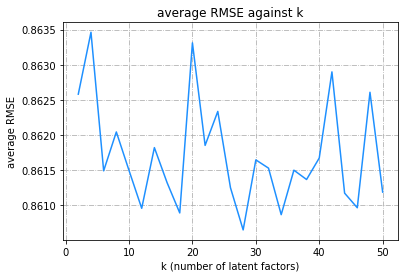

<Figure size 432x288 with 0 Axes>

In [16]:
plot_rmse(rmse_MFbias_pmt)
min_rmse_MFbias_pmt = min(rmse_MFbias_pmt)
print('The minimum average RMSE value is:',min_rmse_MFbias_pmt)

### MF with bias on unpopular movie trimmed dataset

In [20]:
rmse_MFbias_upmt = MF_bias_trimmed(ratingsdf,unpopulartrim)

RMSE: 0.8648
RMSE: 0.9018
RMSE: 0.8935
RMSE: 0.9130
RMSE: 0.9150
RMSE: 0.8640
RMSE: 0.9199
RMSE: 0.9038
RMSE: 0.8732
RMSE: 0.9034
RMSE: 0.9060
RMSE: 0.9271
RMSE: 0.8925
RMSE: 0.9322
RMSE: 0.8545
RMSE: 0.8835
RMSE: 0.8747
RMSE: 0.8689
RMSE: 0.8669
RMSE: 0.9482
RMSE: 0.8902
RMSE: 0.8677
RMSE: 0.8818
RMSE: 0.8955
RMSE: 0.9570
RMSE: 0.8864
RMSE: 0.8809
RMSE: 0.8751
RMSE: 0.8783
RMSE: 0.8526
RMSE: 0.8752
RMSE: 0.8670
RMSE: 0.9015
RMSE: 0.9078
RMSE: 0.8955
RMSE: 0.8834
RMSE: 0.9122
RMSE: 0.8878
RMSE: 0.8817
RMSE: 0.9357
RMSE: 0.8868
RMSE: 0.9175
RMSE: 0.8692
RMSE: 0.9121
RMSE: 0.9035
RMSE: 0.8858
RMSE: 0.8818
RMSE: 0.9127
RMSE: 0.8807
RMSE: 0.8950
RMSE: 0.8924
RMSE: 0.8944
RMSE: 0.9339
RMSE: 0.8828
RMSE: 0.8890
RMSE: 0.8976
RMSE: 0.8463
RMSE: 0.8671
RMSE: 0.9127
RMSE: 0.8962
RMSE: 0.9170
RMSE: 0.8833
RMSE: 0.8720
RMSE: 0.8844
RMSE: 0.8664
RMSE: 0.9148
RMSE: 0.8906
RMSE: 0.8966
RMSE: 0.8900
RMSE: 0.8837
RMSE: 0.8936
RMSE: 0.8804
RMSE: 0.8588
RMSE: 0.9295
RMSE: 0.9358
RMSE: 0.9025
RMSE: 0.8505

The minimum average RMSE value is: 0.8844480962651862


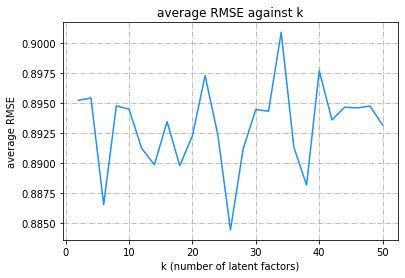

<Figure size 432x288 with 0 Axes>

In [21]:
plot_rmse(rmse_MFbias_upmt)
min_rmse_MFbias_upmt = min(rmse_MFbias_upmt)
print('The minimum average RMSE value is:',min_rmse_MFbias_upmt)

### MF with bias on High variance movie trimming dataset

In [28]:
rmse_MFbias_hvmt = MF_bias_trimmed(ratingsdf,highvartrim)

RMSE: 1.8446
RMSE: 1.3185
RMSE: 1.9206
RMSE: 1.3447
RMSE: 1.6128
RMSE: 1.7915
RMSE: 1.6308
RMSE: 1.2745
RMSE: 1.7184
RMSE: 1.6823
RMSE: 1.6293
RMSE: 1.5118
RMSE: 1.5271
RMSE: 1.6754
RMSE: 1.6223
RMSE: 1.3332
RMSE: 1.6460
RMSE: 1.8099
RMSE: 1.7668
RMSE: 1.3478
RMSE: 1.6163
RMSE: 1.6121
RMSE: 1.5607
RMSE: 1.6620
RMSE: 1.5399
RMSE: 1.4095
RMSE: 1.5969
RMSE: 1.3948
RMSE: 1.9989
RMSE: 1.6796
RMSE: 1.3122
RMSE: 1.8041
RMSE: 1.4954
RMSE: 2.0921
RMSE: 1.6586
RMSE: 0.6210
RMSE: 1.3831
RMSE: 1.8347
RMSE: 1.9620
RMSE: 1.4032
RMSE: 1.9388
RMSE: 1.4595
RMSE: 1.8628
RMSE: 1.7507
RMSE: 1.3208
RMSE: 1.1609
RMSE: 1.7324
RMSE: 1.5263
RMSE: 1.5497
RMSE: 1.3489
RMSE: 2.0095
RMSE: 1.5830
RMSE: 1.6191
RMSE: 1.6031
RMSE: 1.6388
RMSE: 1.6055
RMSE: 1.3988
RMSE: 1.6805
RMSE: 1.4492
RMSE: 1.6687
RMSE: 1.7827
RMSE: 2.0380
RMSE: 1.1436
RMSE: 1.4814
RMSE: 1.9325
RMSE: 1.4600
RMSE: 1.7548
RMSE: 1.4938
RMSE: 1.3009
RMSE: 1.2855
RMSE: 1.6643
RMSE: 1.5125
RMSE: 1.5237
RMSE: 1.6096
RMSE: 1.4602
RMSE: 1.2959
RMSE: 1.6890

The minimum average RMSE value is: 1.4800441607855728


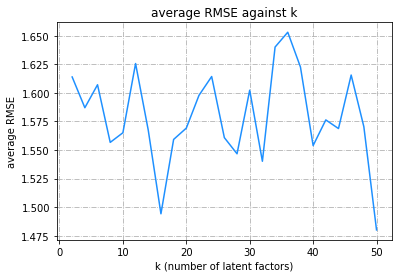

<Figure size 432x288 with 0 Axes>

In [29]:
plot_rmse(rmse_MFbias_hvmt)
min_rmse_MFbias_hvmt = min(rmse_MFbias_hvmt)
print('The minimum average RMSE value is:',min_rmse_MFbias_hvmt)

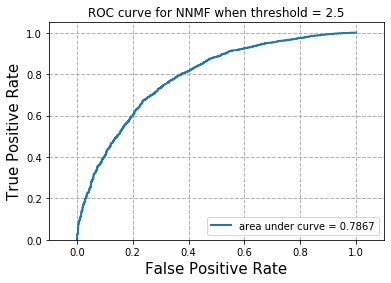

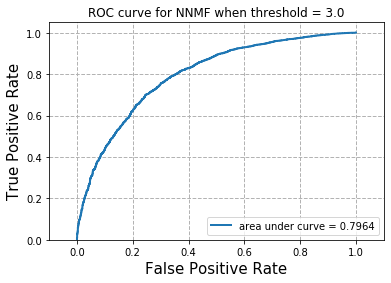

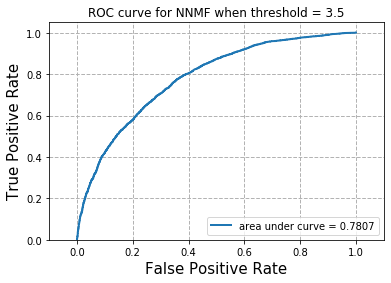

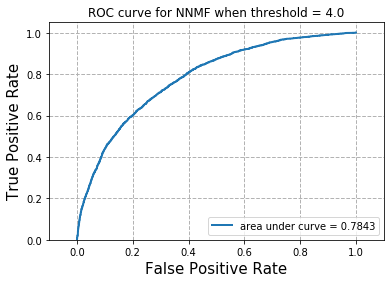

In [37]:
from surprise.model_selection import train_test_split
threshold = [2.5, 3, 3.5, 4]
svd = SVD(n_factors=38)
trainset, testset = train_test_split(load_dataset(ratingsdf), test_size=.1)
predictions = svd.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for NNMF when threshold = %2.1f' % thresh)

# part6

In [42]:
ratings_surprise_dataset = Dataset.load_from_df(ratingsdf[['userId','movieId','rating']], reader)

In [43]:
class NaiveFilter(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)
    def fit(self, trainset):
        AlgoBase.fit(self, trainset)

        self.trainset = trainset
        self.the_means = {}
        for key in self.trainset.ur:
            urs = self.trainset.ur[key]
            mean = np.mean([r for (_, r) in urs])
            self.the_means[key] = mean
        return self
    def estimate(self, u, i):
        if self.the_means.__contains__(u):
            return self.the_means[u]
        else:
            return 0 

In [44]:
nfmae, nfrmse = [],[]

naive_filter = NaiveFilter()
cv = cross_validate(naive_filter, ratings_surprise_dataset,measures=['RMSE','MAE'],cv=10, verbose=False)
nfrmse.append(np.mean(cv['test_rmse']))
nfmae.append(np.mean(cv['test_mae']))

# Q30

In [45]:
print('average RMSE: ', nfrmse)
print('average MAE: ', nfmae)

average RMSE:  [0.941087572259217]
average MAE:  [0.7337471666142722]


In [50]:
def RMSETRIM(trimset):
    kf = KFold(n_splits=10)
    RMSE_filtered_nf_biased = []

    nf = NaiveFilter()
    temp_rsme = []

    for trainset, testset in kf.split(ratings_surprise_dataset):
        #train and test
        nf.fit(trainset)
        if trimset==highvartrim:
            filtered_testset = highvartrim(trainset,testset)
        elif trimset==unpopulartrim:
            filtered_testset = unpopulartrim(trainset,testset)
        elif trimset==populartrim:
            filtered_testset = populartrim(trainset,testset)
        pred = nf.test(filtered_testset)    
        #calculate RMSE
        temp_rsme.append(accuracy.rmse(pred, verbose=False))
    RMSE_filtered_nf_biased.append(np.mean(temp_rsme))
    return RMSE_filtered_nf_biased

### Q31&Q32&Q33

In [51]:
print ('average RMSE of popular movies is:',RMSETRIM(populartrim))
print ('average RMSE of unpopular movies is:',RMSETRIM(unpopulartrim))
print ('average RMSE of high variance movies is:',RMSETRIM(highvartrim))

average RMSE of popular movies is: [0.9430447740891985]
average RMSE of unpopular movies is: [0.9309275835936264]
average RMSE of high variance movies is: [1.56925364800709]


In [ ]:
#34

In [1]:
def plot_roc_t3(fpr_KNN, tpr_KNN, fpr_NMF, tpr_NMF, fpr_SVD, tpr_SVD, name):
    fig, ax = plt.subplots()
    roc_auc_KNN = metrics.auc(fpr_KNN,tpr_KNN)
    roc_auc_NMF = metrics.auc(fpr_NMF,tpr_NMF)
    roc_auc_SVD = metrics.auc(fpr_SVD,tpr_SVD)

    ax.plot(fpr_KNN, tpr_KNN, lw=2, label= 'KNN: area under curve = %0.4f' % roc_auc_KNN)
    ax.plot(fpr_NMF, tpr_NMF, lw=2, label= 'NMF: area under curve = %0.4f' % roc_auc_NMF)
    ax.plot(fpr_SVD, tpr_SVD, lw=2, label= 'SVD: area under curve = %0.4f' % roc_auc_SVD)
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title(name)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [21]:
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.prediction_algorithms import NMF
from surprise.prediction_algorithms import SVD
from surprise import AlgoBase
from sklearn import metrics
from surprise.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

Computing the pearson similarity matrix...
Done computing similarity matrix.


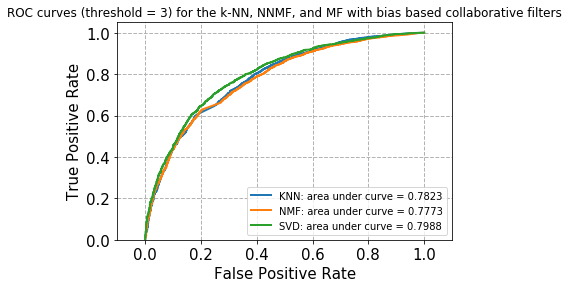

In [10]:
threshold_compare = 3
k_best_KNN = 14
sim_options = {'name': 'pearson', 'user_based': True}
k_best_NMF = 20
k_best_SVD = 38

algo_KNN = KNNWithMeans(k=k_best_KNN, sim_options=sim_options)
algo_NMF = NMF(n_factors=k_best_NMF, biased=False)
algo_SVD = SVD(n_factors=k_best_SVD)

def ROC_helper(algo):
    df = pd.read_csv('./ml-latest-small/ratings.csv')
    reader = Reader(rating_scale=(0.5, 5))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=.1)
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    trues = [0 if getattr(row, 'r_ui') < threshold_compare else 1 for row in predictions]
    scores = [getattr(row, 'est') for row in predictions]
    fpr, tpr, thresholds = metrics.roc_curve(trues, scores)
    return fpr, tpr
fpr_KNN, tpr_KNN = ROC_helper(algo_KNN)
fpr_NMF, tpr_NMF = ROC_helper(algo_NMF)
fpr_SVD, tpr_SVD = ROC_helper(algo_SVD)
   
plot_roc_t3(fpr_KNN, tpr_KNN, fpr_NMF, tpr_NMF, fpr_SVD, tpr_SVD,"ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters")


In [11]:
#36

In [12]:
from collections import defaultdict
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [13]:
threshold_compare = 3
def algorithm_precision_recall(algo):
    avg_precision = []
    avg_recall = []
    t_range = range(1, 26, 1)
    for t in t_range:

        reader = Reader(rating_scale=(1.0, 5.0))
        data = Dataset.load_from_df(ratingsdf[['userId', 'movieId', 'rating']], reader)
        kf = KFold(n_splits=10)
        
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            predictions = algo.test(testset)
            precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=threshold_compare)

        avg_precision.append(np.array(list(precisions.values())).mean())
        avg_recall.append(np.array(list(recalls.values())).mean())
        
    return avg_precision, avg_recall

In [22]:
from surprise import KNNWithMeans
k_best_KNN = 14
sim_options = {'name': 'pearson', 'user_based': True}
algo_KNN = KNNWithMeans(k=k_best_KNN, sim_options=sim_options)

p_knn, r_knn = algorithm_precision_recall(algo_KNN)
with open('Q36_precision_data', 'wb') as fp:
    pickle.dump(p_knn, fp)
with open('Q36_recall_data', 'wb') as fp:
    pickle.dump(r_knn, fp)


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

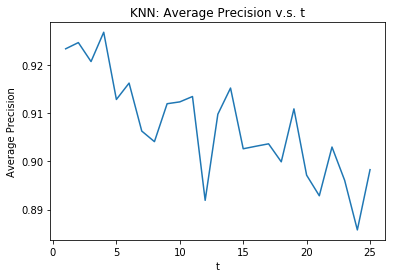

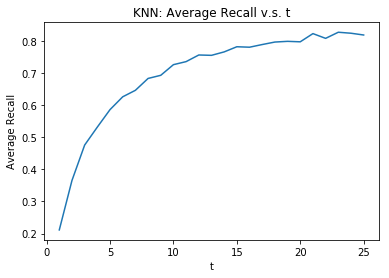

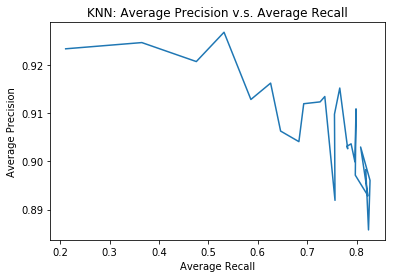

In [23]:
with open('Q36_precision_data', 'rb') as fp:
    p_knn = pickle.load(fp)
with open('Q36_recall_data', 'rb') as fp:
    r_knn = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_knn)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('KNN: Average Precision v.s. t')
plt.show()

t_range = range(1, 26, 1)
plt.plot(t_range, r_knn)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('KNN: Average Recall v.s. t')
plt.show()

plt.plot(r_knn, p_knn)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('KNN: Average Precision v.s. Average Recall')
plt.show()

In [24]:
#Q37

In [25]:
from surprise import NMF
import pickle
k_best_NMF = 20
algo_NMF = NMF(n_factors=k_best_NMF, biased=False)
p_nmf, r_nmf = algorithm_precision_recall(algo_NMF)

with open('Q37_precision_data', 'wb') as fp:
    pickle.dump(p_nmf, fp)
with open('Q37_recall_data', 'wb') as fp:
    pickle.dump(r_nmf, fp)

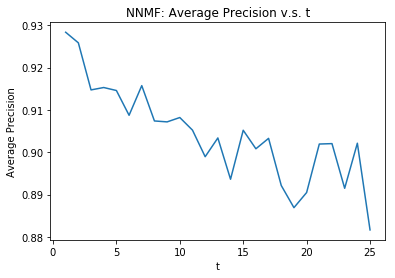

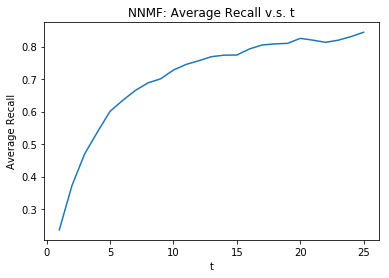

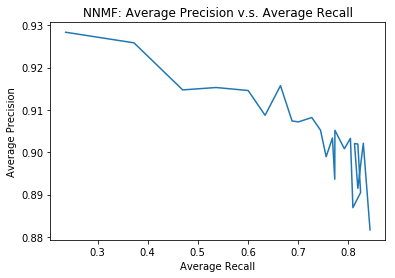

In [26]:
with open('Q37_precision_data', 'rb') as fp:
    p_nmf = pickle.load(fp)
with open('Q37_recall_data', 'rb') as fp:
    r_nmf = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_nmf)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('NNMF: Average Precision v.s. t')
plt.show()

t_range = range(1, 26, 1)
plt.plot(t_range, r_nmf)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('NNMF: Average Recall v.s. t')
plt.show()

plt.plot(r_nmf, p_nmf)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('NNMF: Average Precision v.s. Average Recall')
plt.show()

In [27]:
#Q38

In [28]:
from surprise import SVD
k_best_SVD = 38
algo_SVD = SVD(n_factors=k_best_SVD)
p_svd, r_svd = algorithm_precision_recall(algo_SVD)
with open('Q38_precision_data', 'wb') as fp:
    pickle.dump(p_svd, fp)
with open('Q38_recall_data', 'wb') as fp:
    pickle.dump(r_svd, fp)

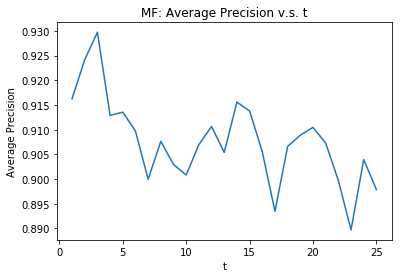

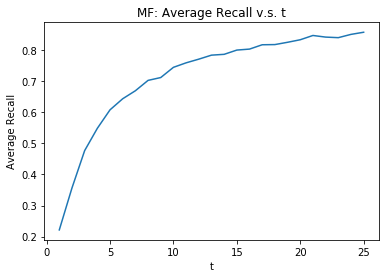

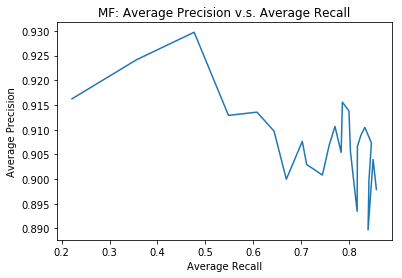

In [29]:
with open('Q38_precision_data', 'rb') as fp:
    p_svd = pickle.load(fp)
with open('Q38_recall_data', 'rb') as fp:
    r_svd = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_svd)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('MF: Average Precision v.s. t')
plt.show()

plt.plot(t_range, r_svd)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('MF: Average Recall v.s. t')
plt.show()

plt.plot(r_svd, p_svd)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('MF: Average Precision v.s. Average Recall')
plt.show()

In [30]:
#Q39

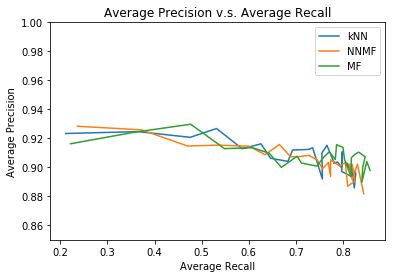

In [31]:
with open('Q36_precision_data', 'rb') as fp:
    p_knn = pickle.load(fp)
with open('Q36_recall_data', 'rb') as fp:
    r_knn = pickle.load(fp)
with open('Q37_precision_data', 'rb') as fp:
    p_nmf = pickle.load(fp)
with open('Q37_recall_data', 'rb') as fp:
    r_nmf = pickle.load(fp)
with open('Q38_precision_data', 'rb') as fp:
    p_svd = pickle.load(fp)
with open('Q38_recall_data', 'rb') as fp:
    r_svd = pickle.load(fp)
    
plt.plot(r_knn, p_knn, label = 'kNN')
plt.plot(r_nmf, p_nmf, label = 'NNMF')
plt.plot(r_svd, p_svd, label = 'MF')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision v.s. Average Recall')
plt.ylim(0.85,1)
plt.legend()
plt.show()

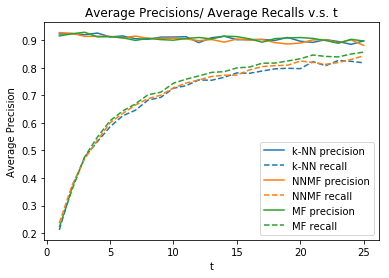

In [32]:
t_range = range(1, 26, 1)
plt.plot(t_range, p_knn, 'C0', label = 'k-NN precision')
plt.plot(t_range, r_knn, 'C0--', label = 'k-NN recall')
plt.plot(t_range, p_nmf, 'C1', label = 'NNMF precision')
plt.plot(t_range, r_nmf, 'C1--', label = 'NNMF recall')
plt.plot(t_range, p_svd, 'C2', label = 'MF precision')
plt.plot(t_range, r_svd, 'C2--', label = 'MF recall')

plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('Average Precisions/ Average Recalls v.s. t')
plt.legend()
plt.show()